In [9]:
# pip install langgraph

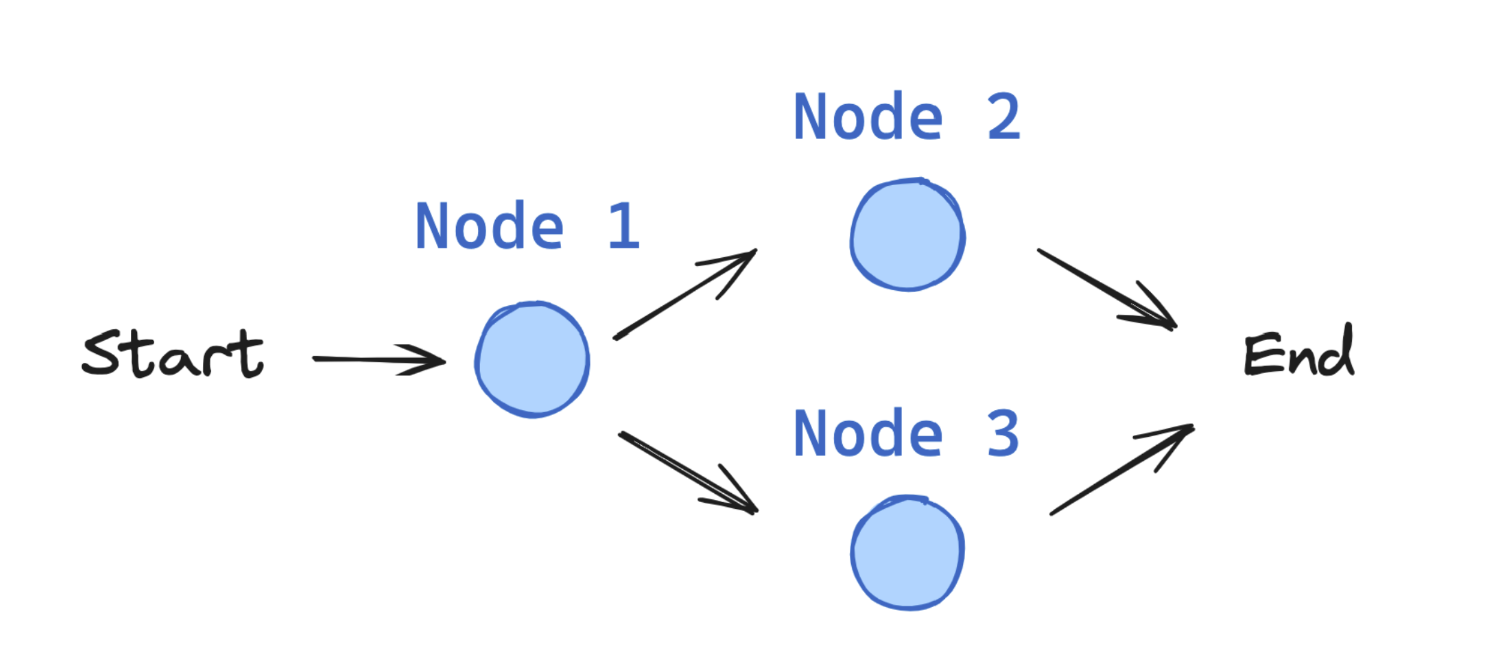

An application in LangGraph starts from an entrypoint, and depending on the execution, the flow may go to one function or another until it reaches the END.




## State
State is the central concept in LangGraph. It represents all the information that flows through your application.



In [19]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

## Nodes
Nodes are python functions. Each node:

- Takes the state as input
- Performs some operation
- Returns updates to the state


For example, Nodes can contain:

- LLM calls: Generate text or make decisions
- Tool calls: Interact with external systems
- Conditional logic: Determine next steps
- Human intervention: Get input from users

In [18]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}

def node_4(state):
    print("---Node 4---")
    return {"graph_state": state['graph_state'] +" and busy"}

## Edges
Edges connect nodes and define the possible paths through your graph:

Edges can be:

- Direct: Always go from node A to node B
- Conditional: Choose the next node based on the current state


In [20]:
import random
from typing import Literal

def decide_mood(state) -> Literal["node_2", "node_3"]:

    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state']

    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"

    # 50% of the time, we return Node 3
    return "node_3"

## StateGraph
The StateGraph is the container that holds your entire agent workflow:



In [21]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

builder= StateGraph(State)

In [22]:
builder

In [23]:
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)

In [24]:
# Logic
builder.add_edge(START, "node_1")

"""After "node_1" finishes, the next node is decided dynamically using the
decide_mood(state) function.

decide_mood randomly chooses 50% chance to go to "node_2" and 50% chance to "node_3".
"""
builder.add_conditional_edges("node_1", decide_mood)

"""If we landed on "node_2", the graph ends immediately.
"""
builder.add_edge("node_2", END)
"""If we landed on "node_3", then we continue to "node_4".

After "node_4", the graph ends.
"""
builder.add_edge("node_3", "node_4")
builder.add_edge("node_4", END)

In [25]:
graph = builder.compile()


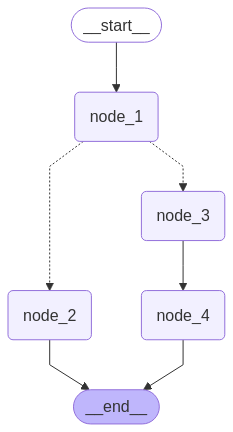

In [26]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [28]:
builder= StateGraph(State)

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_4", "node_3")
builder.add_edge("node_3", END)

In [29]:
graph = builder.compile()


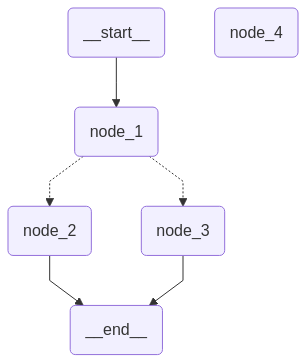

In [30]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))